In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import numpy as np
import graphviz


#Scale 변환: 평균, 표준편차, 기준

from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀분석subset = ['bust','waist', 'pulse_count'],
from statsmodels.formula.api import ols
#qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
#선형 모델 formula(y~X1+X2+...)

import statsmodels.formula.api as smf
#평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as GBC
import seaborn as sns
# 주피터 사용시 그래프자동출력 옵션
matplotlib.rc('font', family ='Malgun Gothic')

import statsmodels.formula.api as smf # 선형모델 formula(y ~ x1 +x2+ x3)
import statsmodels.api as sm
# ols Ordinary Least Squares (최소자승법 라이브러리)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


from statsmodels.api import Logit

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
# 한글 맑은 고딕 적용
matplotlib.rc('font',family='NanumGothic')

# matplotlib  패키지 한글 깨짐 처리
# 한글 폰트(맑은 고딕) 적용 : 윈도우, 구글 콜랩
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

# seaborn에서 한글 깨짐 해결:unicode minus 사용 않기 위한 설정(minus 깨짐 현상 방지)
plt.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.api as smd
from statsmodels.stats.proportion import proportions_ztest

## 혈액검사 데이터프레임 생성  이상치 확인 및 결측치 제거

In [2]:
df = pd.read_csv('./DATA/insu_result.csv', engine = 'python', encoding ='EUC-KR')
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2079,2079,C134188,일반검진,승인,2015-06-22,1,41,175,78,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2080,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2081,2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2079,2079,C134188,일반검진,승인,2015-06-22,1,41,175,78,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2080,2080,C134197,혈액검사,재검,2014-12-23,1,42,178,70,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2081,2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
df['bmi'] = (df['weight']/(df['height']/100)**2).round(2)
df['whtr'] = (df['waist']/100/df['height']).round(2)
df_gender1 = df[df['gender'] == 1]
df_gender1['rfm'] = round(64-(((df["height"]/100)/(df["waist"]/100)))*20,1)
df_gender2 = df[df['gender'] == 2]
df_gender2['rfm'] = round(76-(((df["height"]/100)/(df["waist"]/100)))*20,1)
df_gender = pd.merge(df_gender1, df_gender2, how='outer')
df = df_gender
df

,Unnamed: 0,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,rfm
0,0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.00,19.6
1,1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.01,26.0
2,2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,25.71,0.01,26.5
3,3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,27.55,0.01,26.9
4,4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.00,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,2076,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.01,36.5
2079,2077,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.01,40.8
2080,2078,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.01,38.2
2081,2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,20.57,0.00,31.8


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df_cum = df

In [7]:
df_cum

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,rfm
0,C112379,혈액검사,재검,2014-12-09,1,69,160,59,84.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.00,19.6
1,C112404,혈액검사,재검,2015-03-29,1,69,175,79,101.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.01,26.0
2,C112411,일반검진,재검,2015-09-20,1,69,165,70,92.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,25.71,0.01,26.5
3,C112570,일반검진,재검,2015-05-27,1,67,165,75,95.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,27.55,0.01,26.9
4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.00,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,C134165,혈액검사,재검,2015-01-15,2,48,162,67,101.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.01,36.5
2079,C134172,혈액검사,재검,2015-01-09,2,37,160,70,99.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.01,40.8
2080,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.01,38.2
2081,C134221,혈액검사,재검,2015-09-09,2,51,159,52,85.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,20.57,0.00,31.8


In [8]:
df_cum =df[df['review_cat'] =='혈액검사']

In [9]:
df.drop(['customer_id', 'review_date'], axis =1, inplace = True)

In [10]:
df_blood =df[df['review_cat'] =='혈액검사']

##  이상치 확인 및 결측치 제거 (필요한 변수만 추출)

In [11]:
df_blood

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,rfm
0,혈액검사,재검,1,69,160,59,84.0,72.0,80,135,...,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.00,19.6
1,혈액검사,재검,1,69,175,79,101.0,92.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.01,26.0
4,혈액검사,재검,1,62,165,70,96.0,82.0,80,130,...,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.00,23.8
5,혈액검사,승인,1,62,172,61,90.0,73.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.00,16.9
6,혈액검사,재검,1,62,165,72,98.0,88.0,70,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.01,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,혈액검사,승인,2,37,166,65,93.0,87.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,23.59,0.01,37.8
2078,혈액검사,재검,2,48,162,67,101.0,82.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.01,36.5
2079,혈액검사,재검,2,37,160,70,99.0,91.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.01,40.8
2080,혈액검사,승인,2,53,155,62,94.0,82.0,85,120,...,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.01,38.2


In [12]:
df_blood['risk'].value_counts()

1    1277
0     330
Name: risk, dtype: int64

In [13]:
df_blood.to_csv('./DATA/혈액기존고객.csv',encoding = 'euckr')

In [14]:
df_blood.isna().sum()

review_cat             0
judge                  0
gender                 0
age                    0
height                 0
weight                 0
bust                   1
waist                  1
bp_min                 0
bp_max                 0
pulse_count            1
bt_chol                0
bt_crea              811
bt_gluc                0
bt_hb                446
bt_hbsa                0
bt_hct               446
bt_mch               446
bt_mchc              446
bt_mvc               446
bt_plat              446
bt_rbc               446
bt_wbc               446
bt_rgpt              750
bt_sgot              707
bt_sgpt                0
bt_trig              691
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge          0
bt_crea_judge          0
bt_gluc_judge          0
bt_hb_judge            0
bt_hbsa_judge          0
bt_hct_judge           0
bt_mch_judge           0
bt_mchc_judge          0
bt_mvc_judge           0
bt_plat_judge          0


In [15]:
df_blood[df_blood !=df_blood[df_blood.isna()]]

,review_cat,judge,gender,age,height,weight,bust,waist,bp_min,bp_max,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,rfm
0,혈액검사,재검,1,69,160,59,84.0,72.0,80,135,...,0.0,0.0,1.0,0.0,0.0,0.0,1,23.05,0.00,19.6
1,혈액검사,재검,1,69,175,79,101.0,92.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.80,0.01,26.0
4,혈액검사,재검,1,62,165,70,96.0,82.0,80,130,...,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.00,23.8
5,혈액검사,승인,1,62,172,61,90.0,73.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.00,16.9
6,혈액검사,재검,1,62,165,72,98.0,88.0,70,120,...,0.0,0.0,0.0,0.0,0.0,0.0,0,26.45,0.01,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,혈액검사,승인,2,37,166,65,93.0,87.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,23.59,0.01,37.8
2078,혈액검사,재검,2,48,162,67,101.0,82.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.53,0.01,36.5
2079,혈액검사,재검,2,37,160,70,99.0,91.0,80,120,...,0.0,0.0,0.0,0.0,0.0,0.0,1,27.34,0.01,40.8
2080,혈액검사,승인,2,53,155,62,94.0,82.0,85,120,...,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.01,38.2


In [16]:
df_blood.dropna(subset = ['bust','waist', 'pulse_count'],inplace = True)

In [17]:
df_cum.dropna(inplace = True)

In [18]:
df_cum.isna().sum()

customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judge         0
bt_wbc_judg

In [19]:
df_blood.isna().sum()

review_cat             0
judge                  0
gender                 0
age                    0
height                 0
weight                 0
bust                   0
waist                  0
bp_min                 0
bp_max                 0
pulse_count            0
bt_chol                0
bt_crea              811
bt_gluc                0
bt_hb                445
bt_hbsa                0
bt_hct               445
bt_mch               445
bt_mchc              445
bt_mvc               445
bt_plat              445
bt_rbc               445
bt_wbc               445
bt_rgpt              750
bt_sgot              707
bt_sgpt                0
bt_trig              691
judge_score            0
bp_judge               0
pulse_count_judge      0
bt_chol_judge          0
bt_crea_judge          0
bt_gluc_judge          0
bt_hb_judge            0
bt_hbsa_judge          0
bt_hct_judge           0
bt_mch_judge           0
bt_mchc_judge          0
bt_mvc_judge           0
bt_plat_judge          0


In [20]:
#df_blood.drop(['bt_crea','bt_rgpt','bt_sgot','bt_sgot','bt_trig'], axis =1 , inplace = True)

In [21]:
df_blood.dropna(inplace = True)

In [22]:
df_blood.isna().sum()

review_cat           0
judge                0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judge         0
bt_wbc_judge         0
bt_rgpt_judge        0
bt_sgot_jud

In [23]:
df_blood.drop(['judge_score','pulse_count_judge','review_cat', 'judge', 'bt_chol_judge','bt_crea_judge','bt_gluc_judge','bt_hb_judge','bt_hbsa_judge','bt_hct_judge','bt_mch_judge','bt_mchc_judge','bt_mvc_judge','bt_plat_judge','bt_rbc_judge','bt_wbc_judge','bt_rgpt_judge','bt_sgot_judge','bt_sgpt_judge','bt_trig_judge'], axis =1, inplace = True)

In [24]:
#df_blood.drop(['judge_score','pulse_count_judge','review_cat', 'judge', 'bt_chol','bt_gluc','bt_hb','bt_hbsa','bt_hct','bt_mch','bt_mchc','bt_mvc','bt_plat','bt_rbc','bt_wbc','bt_sgpt'], axis =1, inplace = True)

In [25]:
df_blood.isna().sum()

gender         0
age            0
height         0
weight         0
bust           0
waist          0
bp_min         0
bp_max         0
pulse_count    0
bt_chol        0
bt_crea        0
bt_gluc        0
bt_hb          0
bt_hbsa        0
bt_hct         0
bt_mch         0
bt_mchc        0
bt_mvc         0
bt_plat        0
bt_rbc         0
bt_wbc         0
bt_rgpt        0
bt_sgot        0
bt_sgpt        0
bt_trig        0
bp_judge       0
risk           0
bmi            0
whtr           0
rfm            0
dtype: int64

In [26]:
df_blood

,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,...,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr,rfm
4,1,62,165,70,96.0,82.0,80,130,64.0,142.0,...,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.00,23.8
5,1,62,172,61,90.0,73.0,80,120,60.0,148.0,...,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.00,16.9
11,1,61,170,71,100.0,84.0,85,125,76.0,202.0,...,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.00,23.5
26,1,61,168,63,95.0,84.0,80,120,64.0,220.0,...,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.00,24.0
43,1,60,160,60,87.0,72.0,80,120,72.0,170.0,...,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2,44,158,56,87.0,74.0,80,120,78.0,146.0,...,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.00,33.3
2060,2,24,166,68,91.0,84.0,80,120,80.0,198.0,...,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.01,36.5
2071,2,53,160,65,99.0,86.0,80,120,64.0,229.0,...,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.01,38.8
2080,2,53,155,62,94.0,82.0,85,120,64.0,194.0,...,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.01,38.2


In [27]:
def new_hist(data,var):
    plt.hist(data[data['risk']==1][var],label = '위험', alpha = 0.5)
    plt.hist(data[data['risk']==0][var],label = '수익', alpha = 0.5)
    plt.legend()
def new_crosstab(data,var) : 
    print(pd.crosstab(index = data['risk'], columns = data[var]))
    print()
    print(pd.crosstab(index = data['risk'], columns = data[var],normalize = 'columns').round(3))

In [28]:
def my_t(data,var):
    k = stats.levene(data[data['risk']==0][var],data[data['risk']==1][var])
    t_result = stats.ttest_ind(data[data['risk']==0][[var]],
                               data[data['risk']==1][[var]],equal_var=True) # 2 sample 비교 명령어

    t,p = t_result
    print(k,p)

In [29]:
df_cum

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,risk,bmi,whtr,rfm
4,C112856,혈액검사,재검,2015-08-04,1,62,165,70,96.0,82.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1,25.71,0.00,23.8
5,C112878,혈액검사,승인,2015-08-26,1,62,172,61,90.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,20.62,0.00,16.9
11,C113014,혈액검사,재검,2015-08-26,1,61,170,71,100.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,24.57,0.00,23.5
26,C113202,혈액검사,승인,2015-04-02,1,61,168,63,95.0,84.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,22.32,0.00,24.0
43,C113343,혈액검사,재검,2015-06-23,1,60,160,60,87.0,72.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,C132855,혈액검사,승인,2015-06-24,2,44,158,56,87.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,22.43,0.00,33.3
2060,C133725,혈액검사,재검,2015-06-26,2,24,166,68,91.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,24.68,0.01,36.5
2071,C134037,혈액검사,승인,2015-09-06,2,53,160,65,99.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25.39,0.01,38.8
2080,C134184,혈액검사,승인,2015-08-13,2,53,155,62,94.0,82.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,25.81,0.01,38.2


## gender 유의성 확인

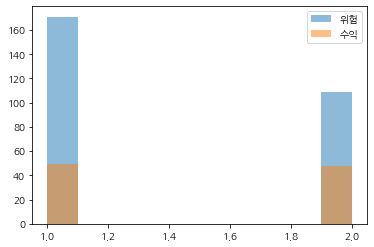

In [30]:
new_hist(df_blood,'gender')

In [31]:
new_crosstab(df_blood,'gender')

gender    1    2
risk            
0        49   48
1       171  109

gender      1      2
risk                
0       0.223  0.306
1       0.777  0.694


혈액검사 이산형 결과만(judge) 고려했을 경우, 또는 연속형인 자료만 고려했을 경우 모두 gender는 유의하지 않음

In [32]:
count = np.array([49,48])
num = np.array([171+49,171+109])

stat, p_value = proportions_ztest(count,num)

print('z검정통계량:{0:0.3f}'.format(stat))
print('p-value:{0:0.3f}'.format(p_value))
print('pvalue가 {0:0.3f}로 0.05보다 크므로 유의하지 않다.'.format(p_value))

z검정통계량:1.440
p-value:0.150
pvalue가 0.150로 0.05보다 크므로 유의하지 않다.


## 리스크 별 각 혈액검사 컬럼의 value 분포

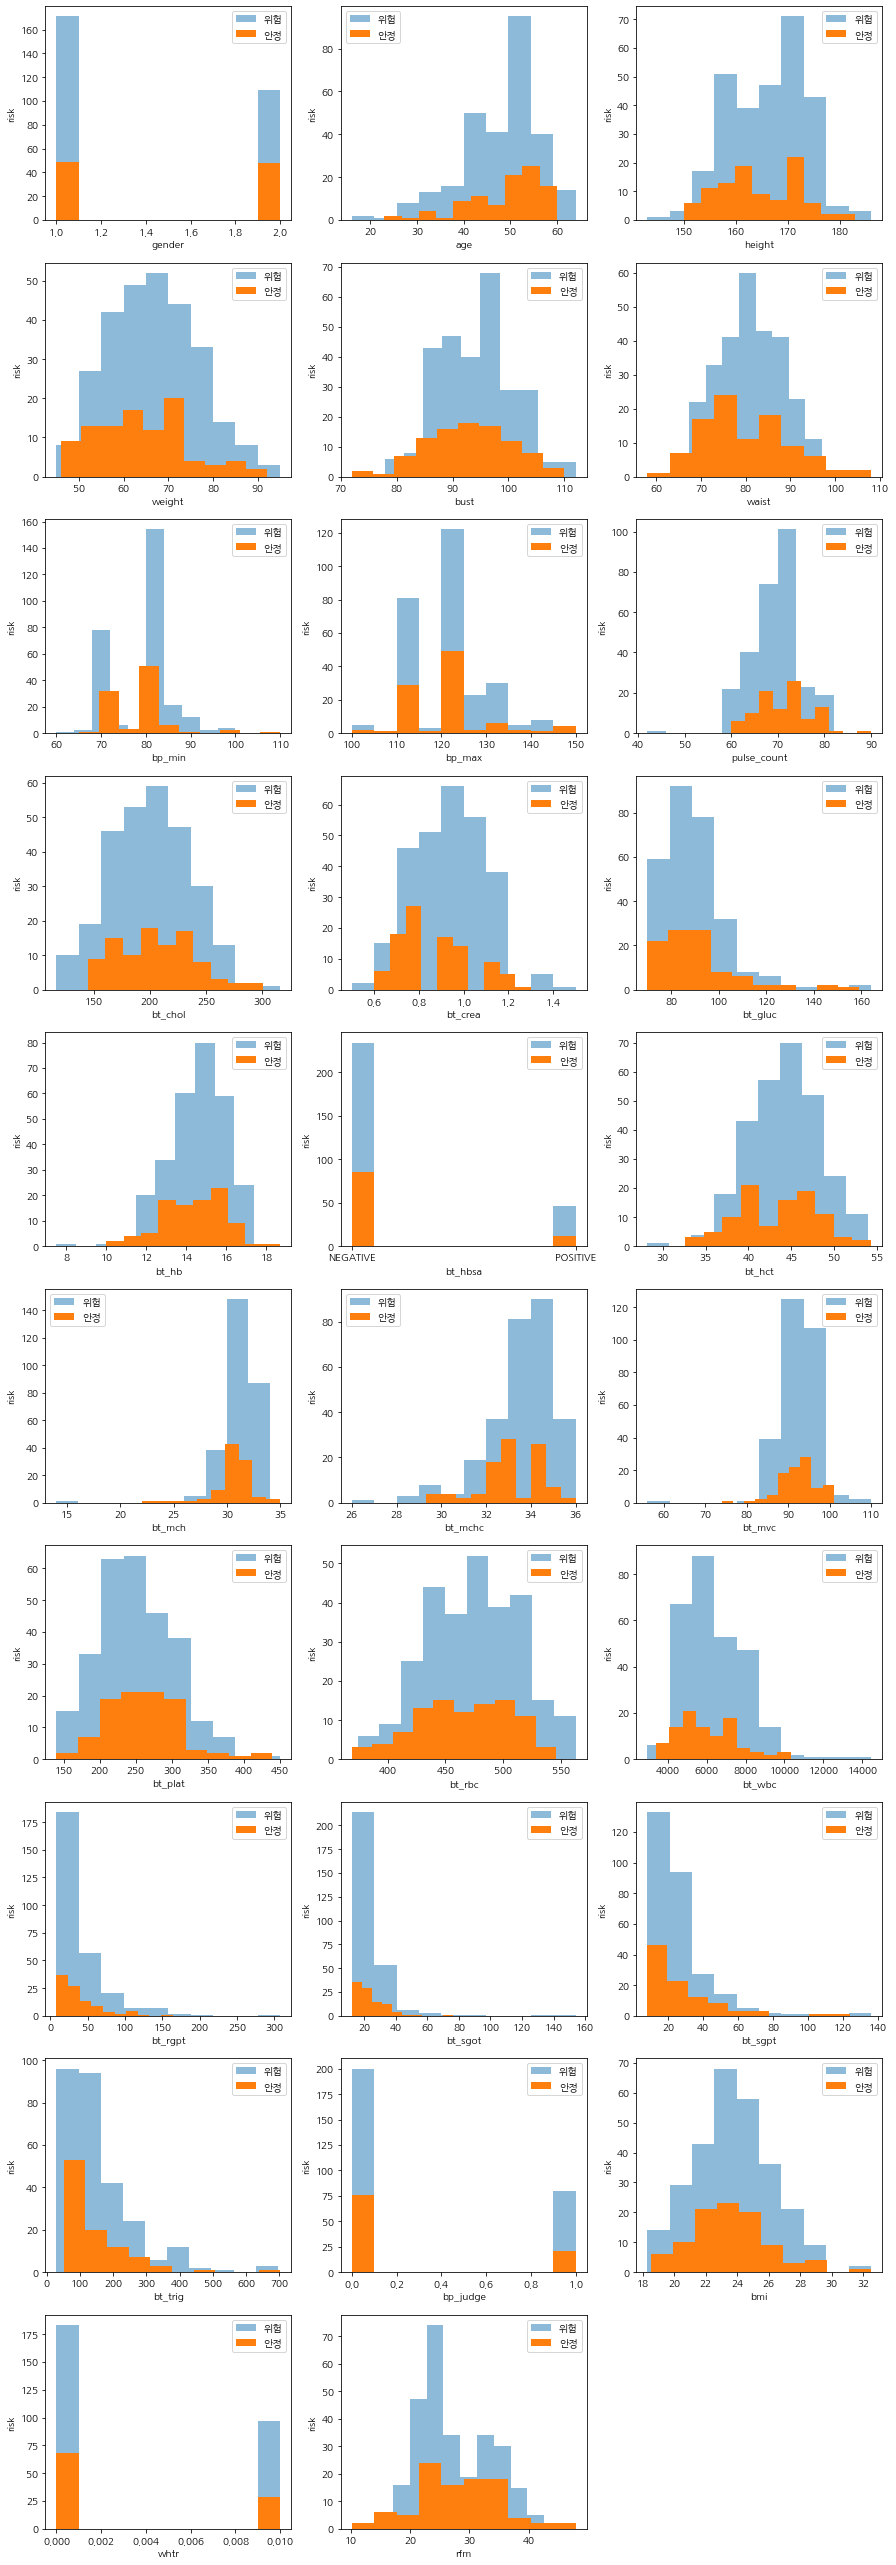

In [33]:
i = 0
fig = plt.figure(figsize = (15, 70))
columns = df_blood.columns.drop('risk')
for col in columns:
    plt.subplot(df_blood.shape[1]//2, 3, i+1)
    i += 1   
    plt.hist(df_blood[df_blood["risk"] == 1][col], label = "위험", alpha = 0.5)
    plt.hist(df_blood[df_blood["risk"] == 0][col], label = "안정", alpha = 1.0)
   
    plt.xlabel(col)
    plt.ylabel("risk")
    plt.legend()
plt.show()

## 데이터 타입 변환 및 전처리

In [34]:
df_blood['gender'] = df_blood['gender'].astype('object')
df_blood['bp_judge'] = df_blood['bp_judge'].astype('object')
df_blood['bt_hbsa'] = df_blood['bt_hbsa'].astype('object')
df_blood.drop(['bp_min','bp_max'], axis = 1, inplace = True)
df_blood

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,...,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr,rfm
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,...,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.00,23.8
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,...,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.00,16.9
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,...,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.00,23.5
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,...,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.00,24.0
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,...,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,...,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.00,33.3
2060,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,...,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.01,36.5
2071,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,...,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.01,38.8
2080,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,...,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.01,38.2


In [35]:
df_blood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       377 non-null    object 
 1   age          377 non-null    int64  
 2   height       377 non-null    int64  
 3   weight       377 non-null    int64  
 4   bust         377 non-null    float64
 5   waist        377 non-null    float64
 6   pulse_count  377 non-null    float64
 7   bt_chol      377 non-null    float64
 8   bt_crea      377 non-null    float64
 9   bt_gluc      377 non-null    float64
 10  bt_hb        377 non-null    float64
 11  bt_hbsa      377 non-null    object 
 12  bt_hct       377 non-null    float64
 13  bt_mch       377 non-null    float64
 14  bt_mchc      377 non-null    float64
 15  bt_mvc       377 non-null    float64
 16  bt_plat      377 non-null    float64
 17  bt_rbc       377 non-null    float64
 18  bt_wbc       377 non-null    float64
 19  bt_rgpt

In [36]:
df1_x = df_blood.drop(["risk"] , axis = 1)
df1_y = df_blood["risk"]
df1_x

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,bmi,whtr,rfm
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,...,561.0,8000.0,36.0,22.0,36.0,174.0,1,25.71,0.00,23.8
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,...,421.0,6800.0,32.0,28.0,19.0,65.0,0,20.62,0.00,16.9
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,...,479.0,5300.0,26.0,24.0,23.0,93.0,1,24.57,0.00,23.5
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,...,450.0,6500.0,89.0,25.0,43.0,101.0,0,22.32,0.00,24.0
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,...,409.0,8400.0,124.0,39.0,29.0,100.0,0,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,...,374.0,7100.0,16.0,15.0,10.0,51.0,0,22.43,0.00,33.3
2060,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,...,433.0,4100.0,15.0,24.0,18.0,53.0,0,24.68,0.01,36.5
2071,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,...,426.0,4700.0,27.0,25.0,25.0,103.0,0,25.39,0.01,38.8
2080,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,...,453.0,5410.0,17.0,22.0,22.0,248.0,1,25.81,0.01,38.2


In [37]:
df_blood["bt_hbsa"] 
df_blood["bt_hbsa"] = np.where(df_blood["bt_hbsa"] == 'POSITIVE',1,0)
df_blood

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,...,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,risk,bmi,whtr,rfm
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,...,8000.0,36.0,22.0,36.0,174.0,1,1,25.71,0.00,23.8
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,...,6800.0,32.0,28.0,19.0,65.0,0,1,20.62,0.00,16.9
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,...,5300.0,26.0,24.0,23.0,93.0,1,1,24.57,0.00,23.5
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,...,6500.0,89.0,25.0,43.0,101.0,0,1,22.32,0.00,24.0
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,...,8400.0,124.0,39.0,29.0,100.0,0,1,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,...,7100.0,16.0,15.0,10.0,51.0,0,0,22.43,0.00,33.3
2060,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,...,4100.0,15.0,24.0,18.0,53.0,0,1,24.68,0.01,36.5
2071,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,...,4700.0,27.0,25.0,25.0,103.0,0,1,25.39,0.01,38.8
2080,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,...,5410.0,17.0,22.0,22.0,248.0,1,0,25.81,0.01,38.2


## 로지스틱 회귀분석을 통한 vital few 선정

In [38]:
df_train, df_test = train_test_split(df_blood, test_size = 0.3 , random_state = 1234)
print(f'train data size : {df_train.shape}')
print(f'test data size : {df_test.shape}')

#from_formula 함수를 이용하여 변수 역할 지정
#분석 대상 이벤트 = 1
log_model = Logit.from_formula('''risk ~ C(gender) + age + height + bust +weight +bust+ bt_chol +pulse_count+bt_chol+bt_gluc +bt_hb+ C(bt_hbsa)+bt_hct+bt_mch+bt_mchc+ bt_mvc+bt_plat+ bt_rbc+bt_wbc+bt_sgpt+ pulse_count+ C(bp_judge)+ bmi + whtr + rfm''', df_blood)

#적합
log_result = log_model.fit()
#결과 출력
print(log_result.summary())

train data size : (263, 28)
test data size : (114, 28)
Optimization terminated successfully.
         Current function value: 0.521024
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   risk   No. Observations:                  377
Model:                          Logit   Df Residuals:                      354
Method:                           MLE   Df Model:                           22
Date:                Thu, 18 Mar 2021   Pseudo R-squ.:                 0.08626
Time:                        02:08:04   Log-Likelihood:                -196.43
converged:                       True   LL-Null:                       -214.97
Covariance Type:            nonrobust   LLR p-value:                   0.02315
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0519     32.639   

<AxesSubplot:>

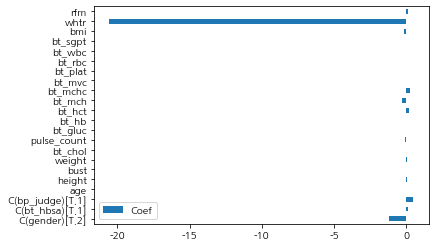

In [39]:
#설명변수 중요도
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = 'Coef')

In [40]:
df1_x = df_blood.drop(['risk'], axis = 1)

In [41]:
df1_x

,gender,age,height,weight,bust,waist,pulse_count,bt_chol,bt_crea,bt_gluc,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,bmi,whtr,rfm
4,1,62,165,70,96.0,82.0,64.0,142.0,1.2,84.0,...,561.0,8000.0,36.0,22.0,36.0,174.0,1,25.71,0.00,23.8
5,1,62,172,61,90.0,73.0,60.0,148.0,1.0,87.0,...,421.0,6800.0,32.0,28.0,19.0,65.0,0,20.62,0.00,16.9
11,1,61,170,71,100.0,84.0,76.0,202.0,1.0,85.0,...,479.0,5300.0,26.0,24.0,23.0,93.0,1,24.57,0.00,23.5
26,1,61,168,63,95.0,84.0,64.0,220.0,1.0,98.0,...,450.0,6500.0,89.0,25.0,43.0,101.0,0,22.32,0.00,24.0
43,1,60,160,60,87.0,72.0,72.0,170.0,0.7,82.0,...,409.0,8400.0,124.0,39.0,29.0,100.0,0,23.44,0.00,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2,44,158,56,87.0,74.0,78.0,146.0,0.6,94.0,...,374.0,7100.0,16.0,15.0,10.0,51.0,0,22.43,0.00,33.3
2060,2,24,166,68,91.0,84.0,80.0,198.0,0.7,91.0,...,433.0,4100.0,15.0,24.0,18.0,53.0,0,24.68,0.01,36.5
2071,2,53,160,65,99.0,86.0,64.0,229.0,0.7,81.0,...,426.0,4700.0,27.0,25.0,25.0,103.0,0,25.39,0.01,38.8
2080,2,53,155,62,94.0,82.0,64.0,194.0,0.8,85.0,...,453.0,5410.0,17.0,22.0,22.0,248.0,1,25.81,0.01,38.2


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#RFE 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표 변수 분리
df1_y = df_blood['risk']

#sklearn의 선형회귀 모델
model = LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df1_x, df1_y)

#선택된 변수
selected_cols = df1_x.columns[rfe.support_]

#제거된 변수
removed_cols = df1_x.columns[~rfe.support_]


print(f'Selected Vairables : {selected_cols}')
print(f'Removed Variables : {removed_cols}')

Selected Vairables : Index(['gender', 'waist', 'bt_crea', 'whtr', 'rfm'], dtype='object')
Removed Variables : Index(['age', 'height', 'weight', 'bust', 'pulse_count', 'bt_chol', 'bt_gluc',
       'bt_hb', 'bt_hbsa', 'bt_hct', 'bt_mch', 'bt_mchc', 'bt_mvc', 'bt_plat',
       'bt_rbc', 'bt_wbc', 'bt_rgpt', 'bt_sgot', 'bt_sgpt', 'bt_trig',
       'bp_judge', 'bmi'],
      dtype='object')


## 모델링

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [44]:
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       377 non-null    object 
 1   age          377 non-null    int64  
 2   height       377 non-null    int64  
 3   weight       377 non-null    int64  
 4   bust         377 non-null    float64
 5   waist        377 non-null    float64
 6   pulse_count  377 non-null    float64
 7   bt_chol      377 non-null    float64
 8   bt_crea      377 non-null    float64
 9   bt_gluc      377 non-null    float64
 10  bt_hb        377 non-null    float64
 11  bt_hbsa      377 non-null    int64  
 12  bt_hct       377 non-null    float64
 13  bt_mch       377 non-null    float64
 14  bt_mchc      377 non-null    float64
 15  bt_mvc       377 non-null    float64
 16  bt_plat      377 non-null    float64
 17  bt_rbc       377 non-null    float64
 18  bt_wbc       377 non-null    float64
 19  bt_rgpt

In [45]:
df1_x = df_blood[['bt_chol', 'bt_hbsa', 'bt_gluc', 'pulse_count','whtr','rfm', 'bt_wbc','gender','age','bt_sgot']]

In [46]:
#df1_x = df_blood[['pulse_count','bt_crea','bt_hb','bt_rgpt','bt_sgot','bt_trig','bmi','bt_chol', 'bt_hbsa', 'bt_gluc', 'whtr', 'bp_judge','rfm']]

In [47]:
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 4 to 2081
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bt_chol      377 non-null    float64
 1   bt_hbsa      377 non-null    int64  
 2   bt_gluc      377 non-null    float64
 3   pulse_count  377 non-null    float64
 4   whtr         377 non-null    float64
 5   rfm          377 non-null    float64
 6   bt_wbc       377 non-null    float64
 7   gender       377 non-null    object 
 8   age          377 non-null    int64  
 9   bt_sgot      377 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 32.4+ KB


In [48]:
# df1_x['bt_hbsa'] = df1_x['bt_hbsa'].astype('object')
# df1_x.info()

In [49]:
df_raw_dummy = pd.get_dummies(df1_x)
df_raw_dummy.head()

,bt_chol,bt_hbsa,bt_gluc,pulse_count,whtr,rfm,bt_wbc,age,bt_sgot,gender_1,gender_2
4,142.0,0,84.0,64.0,0.0,23.8,8000.0,62,22.0,1,0
5,148.0,0,87.0,60.0,0.0,16.9,6800.0,62,28.0,1,0
11,202.0,0,85.0,76.0,0.0,23.5,5300.0,61,24.0,1,0
26,220.0,0,98.0,64.0,0.0,24.0,6500.0,61,25.0,1,0
43,170.0,0,82.0,72.0,0.0,19.6,8400.0,60,39.0,1,0


In [50]:
df_raw_dummy

,bt_chol,bt_hbsa,bt_gluc,pulse_count,whtr,rfm,bt_wbc,age,bt_sgot,gender_1,gender_2
4,142.0,0,84.0,64.0,0.00,23.8,8000.0,62,22.0,1,0
5,148.0,0,87.0,60.0,0.00,16.9,6800.0,62,28.0,1,0
11,202.0,0,85.0,76.0,0.00,23.5,5300.0,61,24.0,1,0
26,220.0,0,98.0,64.0,0.00,24.0,6500.0,61,25.0,1,0
43,170.0,0,82.0,72.0,0.00,19.6,8400.0,60,39.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2008,146.0,1,94.0,78.0,0.00,33.3,7100.0,44,15.0,0,1
2060,198.0,1,91.0,80.0,0.01,36.5,4100.0,24,24.0,0,1
2071,229.0,0,81.0,64.0,0.01,38.8,4700.0,53,25.0,0,1
2080,194.0,0,85.0,64.0,0.01,38.2,5410.0,53,22.0,0,1


In [51]:
df_raw_y = df_blood["risk"]

In [52]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, test_size = 0.5, random_state= 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (188, 11)
train data Y size : (188,)
test data X size : (189, 11)
test data Y size : (189,)


In [53]:
tree_uncustomized =DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.598


In [54]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.683


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gb_final = GradientBoostingClassifier(n_estimators = 50, min_samples_leaf=19, min_samples_split =20,max_depth = 3)
gb_final.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
#test 데이터 설명력
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.894
Score on test set : 0.667


In [56]:
#변수명 저장
v_feature_name = df_train_x.columns

#나무를 만들 때 사용되는 변수들의 중요도
#feature_importances_ : 설명변수의 중요도
#tree_final, feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_uncustomized.feature_importances_

#df_feature_importance 의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,rfm,0.183
8,bt_sgot,0.182
0,bt_chol,0.151
6,bt_wbc,0.148
7,age,0.112
3,pulse_count,0.075
2,bt_gluc,0.060
4,whtr,0.058
1,bt_hbsa,0.032
9,gender_1,0.000


Text(0, 0.5, 'Variable')

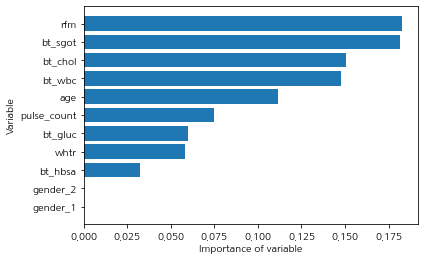

In [57]:
#설명변수 중요도 그래프, 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("Importance of variable")
plt.ylabel("Variable")

In [58]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
#모델 생성
tree_uncustomized = GBC(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

#train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))

#test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.656


## 거절 고객 최종 모델링을 통해 risk 값 도출

In [59]:
df_pre = pd.read_csv('./DATA/insu_pre_review.csv', encoding = 'EUC-KR')
df_pre

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14934,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14935,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14936,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
reject = df_pre[df_pre['judge'] == '거절']

In [61]:
reject_1 = reject[reject['review_cat'] == '혈액검사']

In [62]:
reject_1['bmi'] = (reject_1['weight']/(reject_1['height']/100)**2).round(2)
reject_1['whtr'] = (reject_1['waist']/reject_1['height']).round(2)
df_gender1 = reject_1[reject_1['gender'] == 1]
df_gender1['rfm'] = round(64-(((reject_1["height"]/100)/(reject_1["waist"]/100)))*20,1)
df_gender2 = reject_1[reject_1['gender'] == 2]
df_gender2['rfm'] = round(76-(((reject_1["height"]/100)/(reject_1["waist"]/100)))*20,1)
df_gender = pd.merge(df_gender1, df_gender2, how='outer')
reject_1 = df_gender
reject_1

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
0,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.49,0.55,27.5
1,C112374,혈액검사,거절,2015-01-22,1,70,175,66,98.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.55,0.48,22.3
2,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.91,0.53,26.2
3,C112427,혈액검사,거절,2015-03-19,1,68,169,57,97.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.96,0.48,22.3
4,C112431,혈액검사,거절,2015-04-14,1,68,165,70,97.0,89.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,25.71,0.54,26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,C134142,혈액검사,거절,2015-09-02,2,37,153,52,86.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.21,0.52,37.3
2340,C134149,혈액검사,거절,2015-03-10,2,52,160,62,90.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.22,0.47,33.3
2341,C134162,혈액검사,거절,2014-11-09,2,47,152,50,93.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.64,0.51,36.5
2342,C134163,혈액검사,거절,2015-08-28,2,48,155,58,90.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.14,0.48,34.7


In [63]:
reject_1.isna().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    0
waist                   0
bp_min                  0
bp_max                  0
pulse_count             1
bt_chol                 0
bt_crea              1182
bt_gluc                 0
bt_hb                 825
bt_hbsa                 0
bt_hct                825
bt_mch                825
bt_mchc               825
bt_mvc                825
bt_plat               825
bt_rbc                825
bt_wbc                825
bt_rgpt               829
bt_sgot               800
bt_sgpt                 0
bt_trig               964
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge           0
bt_crea_judge           0
bt_gluc_judge           0
bt_hb_judge             0
bt_hbsa_judge           0
bt_hct_judge            0
bt_mch_judge

In [64]:
df_train_x = df_train[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'pulse_count','whtr','rfm', 'bt_wbc','gender','age','bt_sgot']]
df_train_x['bt_hbsa'] = df_train_x['bt_hbsa'].astype('object')
df_test_x = df_test[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'pulse_count','whtr','rfm', 'bt_wbc','gender','age','bt_sgot']]
df_test_x['bt_hbsa'] = df_test_x['bt_hbsa'].astype('object')
df_train_x = pd.get_dummies(df_train_x)
df_test_x =  pd.get_dummies(df_test_x)

In [65]:
df_test_x = df_test[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'pulse_count','whtr','rfm', 'bt_wbc','gender','age','bt_sgot']]

In [66]:
df_test_x['bt_hbsa'] = df_test_x['bt_hbsa'].astype('object')

In [67]:
df_train_x = pd.get_dummies(df_train_x)

In [68]:
df_test_x =  pd.get_dummies(df_test_x)

In [69]:
df_test_x

,bt_chol,bt_gluc,bmi,pulse_count,whtr,rfm,bt_wbc,age,bt_sgot,bt_hbsa_0,bt_hbsa_1,gender_1,gender_2
356,252.0,87.0,23.94,70.0,0.00,21.3,5100.0,50,18.0,1,0,1,0
790,244.0,87.0,23.23,60.0,0.01,37.5,8100.0,63,17.0,1,0,0,1
1205,191.0,87.0,20.03,82.0,0.00,32.7,5800.0,52,20.0,1,0,0,1
328,220.0,75.0,22.91,68.0,0.00,19.6,7090.0,51,17.0,1,0,1,0
425,188.0,82.0,24.49,42.0,0.00,23.3,8600.0,48,22.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,240.0,84.0,21.56,72.0,0.00,18.6,7700.0,30,19.0,1,0,1,0
1936,230.0,73.0,23.11,66.0,0.00,36.0,3990.0,57,22.0,1,0,0,1
752,201.0,87.0,27.44,60.0,0.01,26.6,4100.0,29,25.0,0,1,1,0
568,233.0,95.0,29.41,68.0,0.00,23.5,6000.0,40,36.0,1,0,1,0


In [70]:
df_test_x

,bt_chol,bt_gluc,bmi,pulse_count,whtr,rfm,bt_wbc,age,bt_sgot,bt_hbsa_0,bt_hbsa_1,gender_1,gender_2
356,252.0,87.0,23.94,70.0,0.00,21.3,5100.0,50,18.0,1,0,1,0
790,244.0,87.0,23.23,60.0,0.01,37.5,8100.0,63,17.0,1,0,0,1
1205,191.0,87.0,20.03,82.0,0.00,32.7,5800.0,52,20.0,1,0,0,1
328,220.0,75.0,22.91,68.0,0.00,19.6,7090.0,51,17.0,1,0,1,0
425,188.0,82.0,24.49,42.0,0.00,23.3,8600.0,48,22.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,240.0,84.0,21.56,72.0,0.00,18.6,7700.0,30,19.0,1,0,1,0
1936,230.0,73.0,23.11,66.0,0.00,36.0,3990.0,57,22.0,1,0,0,1
752,201.0,87.0,27.44,60.0,0.01,26.6,4100.0,29,25.0,0,1,1,0
568,233.0,95.0,29.41,68.0,0.00,23.5,6000.0,40,36.0,1,0,1,0


In [71]:
rf_final = RandomForestClassifier(random_state=1234, n_estimators=20, max_depth=5,min_samples_split=53)
rf_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on prediction: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

ValueError: Found input variables with inconsistent numbers of samples: [263, 188]

In [ ]:
x = reject_1[['bt_chol', 'bt_hbsa', 'bt_gluc', 'bmi', 'bp_judge','whtr','rfm']]
x['bt_hbsa'] = x['bt_hbsa'].astype('object')
x['bp_judge'] = x['bp_judge'].astype('object')
x = pd.get_dummies(x)
x

In [ ]:
pred = rf_final.predict(x)
x['risk'] = pred
x['customer_id'] = reject_1['customer_id']

In [ ]:
x.groupby('risk').count()

2344명의 거절 고객 중,  
 217명 수익, 2127명 위험고객으로 분류

## 거절 고객 중 수익고객과 위험고객 분리하여 csv로 저장

In [ ]:
df_profit = x[x['risk'] == 0][['customer_id','risk']]
df_risk = x[x['risk'] == 1][['customer_id','risk']]

df_profit =  pd.merge(reject_1, df_profit, on = 'customer_id')
df_risk = pd.merge(reject_1, df_risk, on = 'customer_id')

In [ ]:
df_profit

In [ ]:
df_profit

In [ ]:
# df_profitstat = df_profit.groupby(['insu_prod_id']).sum()
# df_profitstat['profit'].sort_values(ascending=True).head(40)

In [ ]:
# df_info = real_final.groupby(['insu_prod_id'])['customer_id'].count()
# df_info.sort_values(ascending=False).head(30)

In [ ]:
df_risk

In [ ]:
df_profit.to_csv('reject_profit.csv',encoding='euckr')
df_risk.to_csv('reject_risk.csv',encoding='euckr')

In [ ]:
df_1 = pd.read_csv('./DATA/insu_request.csv',encoding='euckr')

In [ ]:
# df_1.to_excel('./DATA/insu_request.xlsx',encoding='euckr')

In [ ]:
df_1

In [ ]:
a = df_1.drop_duplicates( ["customer_id" ] )

In [ ]:
a

In [ ]:
a['review_cat'].value_counts()

In [ ]:
a

In [ ]:
a = a[['customer_id','insu_prod_name']]

In [ ]:
b = pd.read_csv('기존위험고객군.csv',encoding='euckr')

In [ ]:
b

In [ ]:
a

In [ ]:
a.to_excel('./DATA/보험상품보자.xlsx',encoding='euckr')

In [ ]:
a

In [ ]:
df_blood

In [ ]:
df_cum

In [ ]:
df_cum.head()

In [ ]:
d = pd.merge(a,df_cum, on = 'customer_id')

In [ ]:
d

In [ ]:
d.columns

In [ ]:
# df_profitstat = d.groupby(['insu_prod_name']).sum()
# print('<보험상품별 손익 계산>, 단위:원')
# df_profitstat['profit'].sort_values(ascending=True).head(5)

In [ ]:
# d.drop('Unnamed: 0', axis = 1, inplace =True)

In [ ]:
# c['risk'] = 1

In [ ]:
# c

In [ ]:
# c.to_csv('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_1.csv',encoding='euckr')
# c.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_1.xlsx',encoding='euckr')

In [ ]:
# d.to_excel('/content/drive/My Drive/Colab Notebooks/A3_보험_DataSet/기존위험고객군_수익.xlsx',encoding='euckr')